Citando cinco diferenças principais:
Enquanto o Random Forest é uma floresta de árvores, o AdaBoost é uma floresta de Stumps. Isto quer dizer que no RF temos árvores completas em que podemos tratar delas assim como qualquer árvore de decisão, no AdaBoost o Stump é uma árvore que apresenta 1 de profundidade e 2 folhas, uma ideia de "tocos" de árvores.
O Random Forest funciona a partir de árvores independentes, de forma que conseguiríamos construir cada uma delas sozinhas e depois realizer uma combinação para obter o resultado da "floresta", porém, no Boosting do AdaBoost a ideia é que a árvore anterior influencia a seguinte.
No Random Forest a resposta de cada árvore tem o mesmo peso para se obter o resultado final enquanto que no AdaBoost as respostas tem pesos diferentes, de forma que os pesos vão sendo alterados conforme o resultado da árvore apresenta acertos ou erros.
Enquanto o RF usa o Bootstraping que faz com que alguns dados sejam amostrados várias vezes e outros não, o AdaBoost foca nos dados que estão sendo 				  				         classificados incorretamente, o fato de que poucas amostras de dados que são classificadas incorretamente recebem pesos mais altos resulta nesses conjuntos de dados que serão amostrados repetidamente na nova amostra de dados.
Como o RF utiliza muitas váriáveis, tem a tendência a ter modelos com maior acurácia do que o AdaBoost, um motivo pelo qual este é comumente utilizado em combinação com outros modelos.
O notebook:
Alguns hiperparâmetros:
n_estimators: controla a quantidade de "weak learners"
learning_rate: controla a contribuição dos "weak learners" para a combinação do resultado final
estimator: pode ser usado para especificar "weak learners" diferentes
max_depth: profundidade
min_samples_split: número mínimo de samples para se considerar um "split"

# Módulo 24 - AdaBoost (Boosting)
## Tarefa 1

### Exemplo 1

#### Import

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

#### Dados

Utilizando os dados "iris".

In [2]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

#### Modelo

In [3]:
clf = AdaBoostClassifier(n_estimators=100)
clf

AdaBoostClassifier(n_estimators=100)

#### Score do modelo

In [4]:
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

### Exemplo 2

In [ ]:
pip install --upgrade scikit-learn

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.inspection import DecisionBoundaryDisplay

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

#### Dados

In [7]:
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

X.shape, y.shape

((500, 2), (500,))

In [ ]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x",
    ylabel="y",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")

for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary")

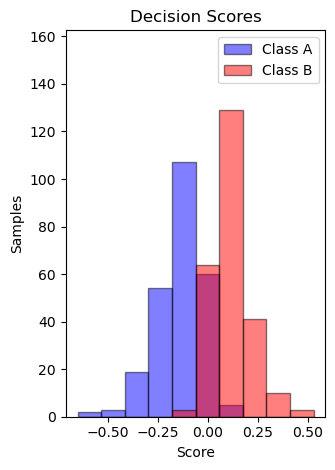

In [10]:
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()